# **Project 1**

2017311974 통계학과 진수정

# 1. Import Library / Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv("/content/drive/MyDrive/기계학습 AAI3006/Project/train.csv")
test = pd.read_csv("/content/drive/MyDrive/기계학습 AAI3006/Project/X_test.csv")

# 2. Data

2.1 Data Description

In [4]:
train.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,label
0,0.159302,0.001206,0.095556,0.103968,0.241841,0.015937,0.380635,24.365636,0.175620,21.451660,23.824941,26.860989,5.409329,178.302275,118.805772,71.780979,60.595704,1.120236,0.456544,0.679286,1.030189,1.554274,0.874988,11.056342,5.862386,7.338043,4.313646,0.626464,0.695773,21.477432,0.693588,-0.327011,2.948707,2.301753,0.621157,-0.636670,1.357991,0.041140,1.294767,1.411157,...,0.013287,1553.790611,13.057997,17276.461014,0.000760,15273.899997,0.010718,1454.616107,0.333077,11.872866,0.153309,17.167801,0.121265,0.000749,2.103438e+01,0.000062,2.359656,0.082971,0.056775,38.786267,0.067508,39.441458,166082.362816,76.087625,93.992936,77.820486,36532.756730,19.835802,40.867942,0.001236,0.000041,0.073747,3.247842,1.524696,0.038395,0.007741,0.009176,0.002994,17.493596,0
1,0.078909,0.000098,0.097341,0.111471,0.152525,0.038076,0.521042,20.450413,0.180559,17.321590,20.874958,23.396257,6.074668,137.679613,87.802155,67.882583,52.059239,0.622723,0.416345,0.396978,0.559901,0.836382,0.439405,4.619568,2.419374,2.571888,1.489682,0.307432,0.502883,25.386675,0.305130,2.699263,1.668620,4.992532,1.532773,3.519948,2.028082,0.065575,1.384110,1.419527,...,0.005533,491.589328,0.276725,20300.495507,0.000696,10802.614674,0.008120,445.160892,0.125321,4.298156,0.011688,8.891616,0.006371,0.000527,1.106866e+07,0.000032,212.740090,0.012751,0.033280,24.012308,0.017846,21.320284,928.943139,41.933796,520.846650,41.720618,388.881196,15.238695,47.110117,0.000494,0.000053,

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Columns: 384 entries, emotion_angry_mean to label
dtypes: float64(383), int64(1)
memory usage: 1.2 MB


In [6]:
train.describe()

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,label
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,4.050000e+02,405.000000,405.000000,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,4.050000e+02,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,0.128547,0.001497,0.103264,0.254882,0.168895,0.049551,0.292277,29.346558,0.198189,25.019881,29.750026,33.620952,8.601071,208.711646,132.711805,90.526609,69.018507,1.258115,0.515119,0.713753,1.126770,1.789339,1.075586,13.890679,7.027224,8.748301,5.267168,0.969419,0.695642,23.821208,0.179616,-1.317826,-1.443551,9.544733,6.442474,-4.798155,-7.102119,0.056249,1.386572,1.333257,...,0.016716,1162.870068,56.391881,7.511756e+04,0.000661,26806.370329,0.017861,1097.405498,9.570555,21.781083,3.137460e+05,30.638778,117.956872,0.001032,1.116691e+05,0.000

In [7]:
test.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_amean_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max
0,0.155693,0.000225,0.077640,0.226517,0.208652,0.044869,0.285805,22.734337,0.204727,18.768689,22.825144,26.437933,7.669243,154.216004,120.644116,98.211368,75.855315,1.015353,0.517132,0.572970,0.892117,1.437425,0.864454,11.547967,6.075034,8.175721,4.964917,0.838042,0.816384,24.897853,0.527930,1.689141,-3.422121,14.106929,0.737629,3.275405,3.215152,0.076818,1.205838,1.659669,...,17982.470382,0.012680,616.083640,0.061312,6200.688869,0.000911,15808.225844,0.012500,591.961803,0.049908,7.843710,0.022597,14.797768,0.013479,0.000349,4330.337793,0.000049,0.019668,0.138786,0.069729,21.824390,0.018730,30.531802,307.571620,66.268935,268.242701,50.879484,667.047326,22.063426,34.789545,0.000287,0.000038,0.051829,2.445959,2.175879,0.027020,0.005952,0.003459,0.001186,15.198562
1,0.177189,0.000472,0.095150,0.250708,0.331609,0.024785,0.118970,32.708595,0.124259,29.709912,32.511974,35.718257,6.008345,136.941469,83.734519,74.981479,57.387060,1.922800,0.456558,1.177125,1.734119,2.672978,1.495853,18.064664,9.747658,13.769853,8.826276,1.329625,0.712600,21.362207,0.830010,-17.246966,-0.134327,15.995365,1.108757,-15.705268,-13.643544,0.036286,1.259429,1.129771,...,50304.793142,0.019419,2070.233673,34.576160,143758.858265,0.000785,42272.420261,0.015091,1995.585941,1.786308,19.838539,7821.411711,27.573449,4.331645,0.001032,4.839315,0.000077,7.919872,0.517096,0.040509,71.631249,0.293790,94.483504,52.795820,88.068110,106.725353,114.730813

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 383 entries, emotion_angry_mean to equivalentSoundLevel_dBp_max
dtypes: float64(383)
memory usage: 299.3 KB


> 결측값 확인

In [9]:
# train, test 데이터셋에 대해 결측값 확인

print('train 데이터의 결측값 개수:',train.isnull().sum().sum())
print('test 데이터의 결측값 개수:',test.isnull().sum().sum())

train 데이터의 결측값 개수: 0
test 데이터의 결측값 개수: 0


> 시각화

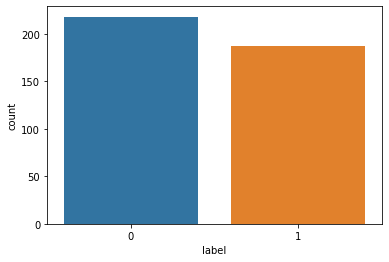

In [10]:
# label의 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'label',data = train)
plt.show()

In [11]:
print(train.label.value_counts())

0    218
1    187
Name: label, dtype: int64


2.2 Data Pre-processing

- 차원 축소

> 하나의 유니크값으로 이루어진 컬럼 제거

In [12]:
one_uniq = [col for col in list(train) if train[col].nunique() <= 1]

In [13]:
train[one_uniq]

,number_faces_var,number_faces_min,emotion_disgust_min,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_min,StddevVoicedSegmentLengthSec_min,StddevUnvoicedSegmentLength_min,number_faces_max
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
400,0.0,1.0,0.0,0.0,0.0,0.0,0.0
401,0.0,1.0,0.0,0.0,0.0,0.0,0.0
402,0.0,1.0,0.0,0.0,0.0,0.0,0.0
403,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [14]:
train = train.drop(train[one_uniq],axis = 1)
test = test.drop(test[one_uniq],axis = 1)

In [15]:
train.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,label
0,0.159302,0.001206,0.095556,0.103968,0.241841,0.015937,0.380635,24.365636,0.175620,21.451660,23.824941,26.860989,5.409329,178.302275,118.805772,71.780979,60.595704,1.120236,0.456544,0.679286,1.030189,1.554274,0.874988,11.056342,5.862386,7.338043,4.313646,0.626464,0.695773,21.477432,0.693588,-0.327011,2.948707,2.301753,0.621157,-0.636670,1.357991,0.041140,1.294767,1.411157,...,0.013287,1553.790611,13.057997,17276.461014,0.000760,15273.899997,0.010718,1454.616107,0.333077,11.872866,0.153309,17.167801,0.121265,0.000749,2.103438e+01,0.000062,2.359656,0.082971,0.056775,38.786267,0.067508,39.441458,166082.362816,76.087625,93.992936,77.820486,36532.756730,19.835802,40.867942,0.001236,0.000041,0.073747,3.247842,1.524696,0.038395,0.007741,0.009176,0.002994,17.493596,0
1,0.078909,0.000098,0.097341,0.111471,0.152525,0.038076,0.521042,20.450413,0.180559,17.321590,20.874958,23.396257,6.074668,137.679613,87.802155,67.882583,52.059239,0.622723,0.416345,0.396978,0.559901,0.836382,0.439405,4.619568,2.419374,2.571888,1.489682,0.307432,0.502883,25.386675,0.305130,2.699263,1.668620,4.992532,1.532773,3.519948,2.028082,0.065575,1.384110,1.419527,...,0.005533,491.589328,0.276725,20300.495507,0.000696,10802.614674,0.008120,445.160892,0.125321,4.298156,0.011688,8.891616,0.006371,0.000527,1.106866e+07,0.000032,212.740090,0.012751,0.033280,24.012308,0.017846,21.320284,928.943139,41.933796,520.846650,41.720618,388.881196,15.238695,47.110117,0.000494,0.000053,

In [16]:
test.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_amean_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean,F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2_mean,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope_mean,loudness_sma3_amean_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_percentile20.0_mean,loudness_sma3_percentile50.0_mean,loudness_sma3_percentile80.0_mean,loudness_sma3_pctlrange0-2_mean,loudness_sma3_meanRisingSlope_mean,loudness_sma3_stddevRisingSlope_mean,loudness_sma3_meanFallingSlope_mean,loudness_sma3_stddevFallingSlope_mean,spectralFlux_sma3_amean_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_amean_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_amean_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,mfcc4_sma3_stddevNorm_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,...,F2bandwidth_sma3nz_amean_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_amean_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3frequency_sma3nz_amean_max,F3frequency_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_amean_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,F3amplitudeLogRelF0_sma3nz_stddevNorm_max,alphaRatioV_sma3nz_amean_max,alphaRatioV_sma3nz_stddevNorm_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_amean_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc2V_sma3nz_stddevNorm_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,hammarbergIndexUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,spectralFluxUV_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,StddevUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max
0,0.155693,0.000225,0.077640,0.226517,0.208652,0.044869,0.285805,22.734337,0.204727,18.768689,22.825144,26.437933,7.669243,154.216004,120.644116,98.211368,75.855315,1.015353,0.517132,0.572970,0.892117,1.437425,0.864454,11.547967,6.075034,8.175721,4.964917,0.838042,0.816384,24.897853,0.527930,1.689141,-3.422121,14.106929,0.737629,3.275405,3.215152,0.076818,1.205838,1.659669,...,17982.470382,0.012680,616.083640,0.061312,6200.688869,0.000911,15808.225844,0.012500,591.961803,0.049908,7.843710,0.022597,14.797768,0.013479,0.000349,4330.337793,0.000049,0.019668,0.138786,0.069729,21.824390,0.018730,30.531802,307.571620,66.268935,268.242701,50.879484,667.047326,22.063426,34.789545,0.000287,0.000038,0.051829,2.445959,2.175879,0.027020,0.005952,0.003459,0.001186,15.198562
1,0.177189,0.000472,0.095150,0.250708,0.331609,0.024785,0.118970,32.708595,0.124259,29.709912,32.511974,35.718257,6.008345,136.941469,83.734519,74.981479,57.387060,1.922800,0.456558,1.177125,1.734119,2.672978,1.495853,18.064664,9.747658,13.769853,8.826276,1.329625,0.712600,21.362207,0.830010,-17.246966,-0.134327,15.995365,1.108757,-15.705268,-13.643544,0.036286,1.259429,1.129771,...,50304.793142,0.019419,2070.233673,34.576160,143758.858265,0.000785,42272.420261,0.015091,1995.585941,1.786308,19.838539,7821.411711,27.573449,4.331645,0.001032,4.839315,0.000077,7.919872,0.517096,0.040509,71.631249,0.293790,94.483504,52.795820,88.068110,106.725353,114.730813

하나의 유니크값으로 이루어진 피쳐는 예측에 도움이 되지 않는 의미없는 컬럼이므로, 해당 컬럼을 제거하였다.

> X,Y 분할

In [17]:
X_train = train.drop('label',axis = 1)
Y_train = train['label']
X_test = test

> PCA 데이터셋 생성

In [18]:
from sklearn.preprocessing import StandardScaler

data = pd.concat([X_train,X_test]) # 전체 데이터에 대해 pca 진행해야 함
data_std = StandardScaler().fit_transform(data)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5) # 주성분 개수 5개로 pca
data_pc = pca.fit_transform(data_std)
data_pc = pd.DataFrame(data = data_pc,columns = ['PC1','PC2','PC3','PC4','PC5'])

In [20]:
print(sum(pca.explained_variance_ratio_))

0.42014342018503237


In [21]:
# train, test 데이터셋으로 다시 분할
X_train_pc = data_pc.iloc[:405,:]
X_test_pc = data_pc.iloc[405:,:]
X_test_pc = X_test_pc.reset_index(drop = True)

In [22]:
X_train_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     405 non-null    float64
 1   PC2     405 non-null    float64
 2   PC3     405 non-null    float64
 3   PC4     405 non-null    float64
 4   PC5     405 non-null    float64
dtypes: float64(5)
memory usage: 15.9 KB


In [23]:
X_test_pc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     100 non-null    float64
 1   PC2     100 non-null    float64
 2   PC3     100 non-null    float64
 3   PC4     100 non-null    float64
 4   PC5     100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


기존 피처의 linear combination인 5개의 PC 변수로 이루어진 데이터셋이다.

> 변수간 상관관계 확인

In [24]:
# correlation matrix (absolute value)
r = train.drop('label',axis = 1).corr().abs()

In [25]:
upper = r.where(np.triu(np.ones(r.shape),k = 1).astype(np.bool))

In [26]:
upper = upper.unstack().dropna()

In [27]:
# corrleation coefficient >= 0.9
high_pairs = upper[upper >= 0.9]
high_pairs

F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean  F0semitoneFrom27.5Hz_sma3nz_amean_mean             0.949581
F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean  F0semitoneFrom27.5Hz_sma3nz_amean_mean             0.987436
                                                 F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean    0.924907
F0semitoneFrom27.5Hz_sma3nz_percentile80.0_mean  F0semitoneFrom27.5Hz_sma3nz_amean_mean             0.943665
                                                 F0semitoneFrom27.5Hz_sma3nz_percentile50.0_mean    0.945024
                                                                                                      ...   
StddevUnvoicedSegmentLength_max                  F3amplitudeLogRelF0_sma3nz_amean_mean              0.901240
                                                 MeanUnvoicedSegmentLength_mean                     0.930148
                                                 StddevUnvoicedSegmentLength_mean                   0.910208
                   

In [28]:
df_pairs = pd.DataFrame(high_pairs)
df_pairs = df_pairs.reset_index()
df_pairs.columns = ['var1','var2','corr']

In [29]:
def find_remove_var(var_pairs,data):
  remove_list = []
  for i in range(len(var_pairs)):
    var1 = var_pairs.loc[i,'var1']
    var2 = var_pairs.loc[i,'var2']
    corr1 = np.corrcoef(data[var1],data['label'])[1,0]
    corr2 = np.corrcoef(data[var2],data['label'])[1,0]
    if corr1 >= corr2:
      remove_list.append(var2)
    else:
      remove_list.append(var1)
  return remove_list

In [30]:
remove_var = find_remove_var(df_pairs,train)
remove_var = set(remove_var)
remove_var = list(remove_var)

In [31]:
train = train.drop(remove_var,axis = 1)
test = test.drop(remove_var,axis = 1)
X_train = X_train.drop(remove_var,axis = 1)
X_test = X_test.drop(remove_var,axis = 1)

In [32]:
X_train.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_pctlrange0-2_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,shimmerLocaldB_sma3nz_stddevNorm_mean,HNRdBACF_sma3nz_amean_mean,HNRdBACF_sma3nz_stddevNorm_mean,logRelF0-H1-H2_sma3nz_amean_mean,logRelF0-H1-H2_sma3nz_stddevNorm_mean,logRelF0-H1-A3_sma3nz_amean_mean,logRelF0-H1-A3_sma3nz_stddevNorm_mean,F1frequency_sma3nz_amean_mean,F1frequency_sma3nz_stddevNorm_mean,F1bandwidth_sma3nz_amean_mean,F1bandwidth_sma3nz_stddevNorm_mean,F1amplitudeLogRelF0_sma3nz_stddevNorm_mean,F2frequency_sma3nz_amean_mean,F2frequency_sma3nz_stddevNorm_mean,F2bandwidth_sma3nz_amean_mean,F2bandwidth_sma3nz_stddevNorm_mean,F2amplitudeLogRelF0_sma3nz_stddevNorm_mean,F3frequency_sma3nz_amean_mean,...,jitterLocal_sma3nz_amean_max,jitterLocal_sma3nz_stddevNorm_max,shimmerLocaldB_sma3nz_amean_max,shimmerLocaldB_sma3nz_stddevNorm_max,HNRdBACF_sma3nz_amean_max,HNRdBACF_sma3nz_stddevNorm_max,logRelF0-H1-H2_sma3nz_amean_max,logRelF0-H1-H2_sma3nz_stddevNorm_max,logRelF0-H1-A3_sma3nz_amean_max,logRelF0-H1-A3_sma3nz_stddevNorm_max,F1bandwidth_sma3nz_stddevNorm_max,F1amplitudeLogRelF0_sma3nz_stddevNorm_max,F2frequency_sma3nz_stddevNorm_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max
0,0.159302,0.001206,0.095556,0.103968,0.241841,0.015937,0.380635,0.175620,21.451660,118.805772,71.780979,0.456544,0.874988,0.695773,0.693588,-0.327011,2.948707,0.621157,-0.636670,0.041140,1.294767,1.411157,0.626918,0.877843,4.139195,-0.287642,-0.290519,15.581802,-0.273956,544.655074,0.392437,1253.904941,0.169909,-2.394409,1537.854905,0.152067,965.712732,0.254926,-1.559542,2522.978859,...,0.000931,0.318359,0.179290,0.034035,5.305944,2899.301813,22.554159,884.256909,41.183660,212.056552,0.004373,310.228394,0.001517,0.013287,13.057997,0.010718,1454.616107,17.167801,0.121265,0.000749,2.103438e+01,0.000062,2.359656,0.056775,38.786267,0.067508,39.441458,76.087625,93.992936,77.820486,36532.756730,19.835802,0.001236,0.000041,3.247842,1.524696,0.038395,0.007741,0.009176,17.493596
1,0.078909,0.000098,0.097341,0.111471,0.152525,0.038076,0.521042,0.180559,17.321590,87.802155,67.882583,0.416345,0.439405,0.502883,0.305130,2.699263,1.668620,1.532773,3.519948,0.065575,1.384110,1.419527,0.543701,-1.146932,0.672221,0.158461,18.794347,16.829154,0.816122,538.892465,0.373174,1256.766817,0.142594,-2.579767,1509.073255,0.163857,955.045890,0.209656,-1.470210,2522.071757,...,0.001752,0.249191,0.073516,0.011544,4.130350,498.347861,35.250829,267415.174368,34.848164,69.305493,0.000972,300.911736,0.001840,0.005533,0.276725,0.008120,445.160892,8.891616,0.006371,0.000527,1.106866e+07,0.000032,212.740090,0.033280,24.012308,0.017846,21.320284,41.933796,520.846650,41.

In [33]:
X_test.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_pctlrange0-2_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,shimmerLocaldB_sma3nz_stddevNorm_mean,HNRdBACF_sma3nz_amean_mean,HNRdBACF_sma3nz_stddevNorm_mean,logRelF0-H1-H2_sma3nz_amean_mean,logRelF0-H1-H2_sma3nz_stddevNorm_mean,logRelF0-H1-A3_sma3nz_amean_mean,logRelF0-H1-A3_sma3nz_stddevNorm_mean,F1frequency_sma3nz_amean_mean,F1frequency_sma3nz_stddevNorm_mean,F1bandwidth_sma3nz_amean_mean,F1bandwidth_sma3nz_stddevNorm_mean,F1amplitudeLogRelF0_sma3nz_stddevNorm_mean,F2frequency_sma3nz_amean_mean,F2frequency_sma3nz_stddevNorm_mean,F2bandwidth_sma3nz_amean_mean,F2bandwidth_sma3nz_stddevNorm_mean,F2amplitudeLogRelF0_sma3nz_stddevNorm_mean,F3frequency_sma3nz_amean_mean,...,jitterLocal_sma3nz_amean_max,jitterLocal_sma3nz_stddevNorm_max,shimmerLocaldB_sma3nz_amean_max,shimmerLocaldB_sma3nz_stddevNorm_max,HNRdBACF_sma3nz_amean_max,HNRdBACF_sma3nz_stddevNorm_max,logRelF0-H1-H2_sma3nz_amean_max,logRelF0-H1-H2_sma3nz_stddevNorm_max,logRelF0-H1-A3_sma3nz_amean_max,logRelF0-H1-A3_sma3nz_stddevNorm_max,F1bandwidth_sma3nz_stddevNorm_max,F1amplitudeLogRelF0_sma3nz_stddevNorm_max,F2frequency_sma3nz_stddevNorm_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max
0,0.155693,0.000225,0.077640,0.226517,0.208652,0.044869,0.285805,0.204727,18.768689,120.644116,98.211368,0.517132,0.864454,0.816384,0.527930,1.689141,-3.422121,0.737629,3.275405,0.076818,1.205838,1.659669,0.564678,-0.045818,-1.300836,2.728719,-0.394607,13.197454,2.309000,466.018209,0.311096,1208.817200,0.170271,-1.495334,1481.746006,0.129748,885.219095,0.327115,-1.105450,2469.040134,...,0.002208,0.162532,0.105902,0.012101,4.956357,314.939318,35.531743,673.608950,23.844690,647.327806,0.002534,0.312737,0.001761,0.012680,0.061312,0.012500,591.961803,14.797768,0.013479,0.000349,4330.337793,0.000049,0.019668,0.069729,21.824390,0.018730,30.531802,66.268935,268.242701,50.879484,667.047326,22.063426,0.000287,0.000038,2.445959,2.175879,0.027020,0.005952,0.003459,15.198562
1,0.177189,0.000472,0.095150,0.250708,0.331609,0.024785,0.118970,0.124259,29.709912,83.734519,74.981479,0.456558,1.495853,0.712600,0.830010,-17.246966,-0.134327,1.108757,-15.705268,0.036286,1.259429,1.129771,0.611353,3.541452,1.525943,3.298607,7.724861,12.541421,0.904145,630.279075,0.397053,1145.179231,0.194081,-1.563537,1642.592616,0.154431,890.112660,0.310175,-1.351307,2603.947617,...,0.001043,0.339778,0.144506,0.045126,11.216980,116.194420,27.737827,19514.142836,45.050133,6.150408,0.006607,9.016917,0.002131,0.019419,34.576160,0.015091,1995.585941,27.573449,4.331645,0.001032,4.839315,0.000077,7.919872,0.040509,71.631249,0.293790,94.483504,88.068110,106.725353,114.730813,317

Highly correlated 한 피처가 있으면 다중공선성 문제가 발생할 수 있으며 현재 피처의 개수가 지나치게 많기 때문에,
상관계수가 0.9보다 큰 변수쌍에 대해, Y와 상관계수가 더 낮은 피처를 제거하였다. 

# 3. Analysis

- Feature Engineering

> 5개의 PC 변수를 추가

In [34]:
train_X = X_train.copy()
train_X['PC1'] = X_train_pc['PC1']
train_X['PC2'] = X_train_pc['PC2']
train_X['PC3'] = X_train_pc['PC3']
train_X['PC4'] = X_train_pc['PC4']
train_X['PC5'] = X_train_pc['PC5']

test_X = X_test.copy()
test_X['PC1'] = X_test_pc['PC1']
test_X['PC2'] = X_test_pc['PC2']
test_X['PC3'] = X_test_pc['PC3']
test_X['PC4'] = X_test_pc['PC4']
test_X['PC5'] = X_test_pc['PC5']

차원축소된 PCA 데이터를 이용하여 모델링을 했을 때, 기존 데이터셋의 성능보다는 좋지 않았지만 상당히 괜찮은 성능을 보였다. 이에 예측 성능을 높이기 위해 PC 성분을 기존 데이터셋에 추가하였다.

> 시각화 정보를 바탕으로 피처 추가

In [35]:
train2 = train.copy()

In [36]:
train2['label'] = train2['label'].astype('object')
train2['slope2'] = train2['slopeUV0-500_sma3nz_amean_min'] ** 2

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


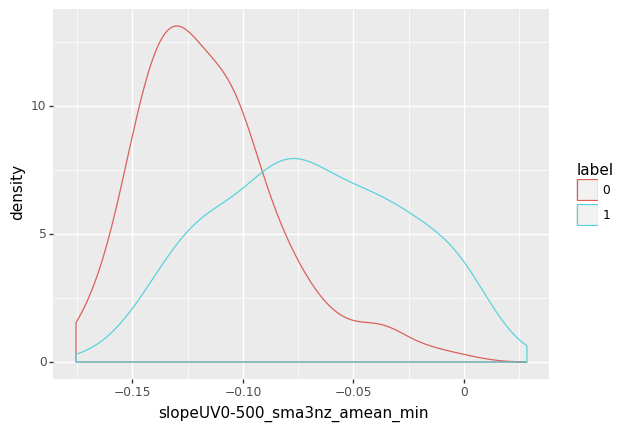

<ggplot: (8784026167417)>

In [37]:
from plotnine import *
ggplot(train2,aes(x = 'slopeUV0-500_sma3nz_amean_min',color = 'label')) + geom_density()

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


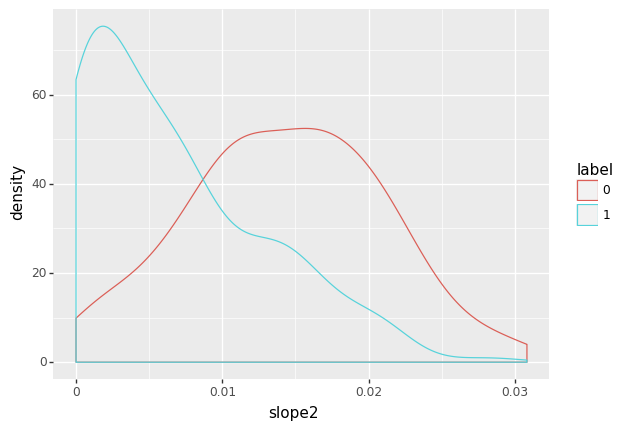

<ggplot: (8783993064845)>

In [38]:
ggplot(train2,aes(x = 'slope2',color = 'label')) + geom_density()

In [39]:
train_X['slope2'] = train_X['slopeUV0-500_sma3nz_amean_min'] ** 2
test_X['slope2'] = test_X['slopeUV0-500_sma3nz_amean_min'] ** 2

시각화 결과, 'slopeUV0-500_sma3nz_amean_min'의 제곱은 라벨 분류에 효과적이라고 판단되어, 해당 변수를 추가하였다.

> Clustering 결과를 추가

In [40]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering

In [41]:
# 클러스터링 할 때 피처의 영향력을 동등하게 하기 위해, 사용할 피처 정규화
train_std = train_X[['PC1','PC2']]
train_std = StandardScaler().fit_transform(train_std)
train_std = pd.DataFrame(train_std)
train_std.columns = ['PC1','PC2']
kmeans = KMeans(n_clusters = 2,random_state = 42).fit(train_std[['PC1','PC2']])

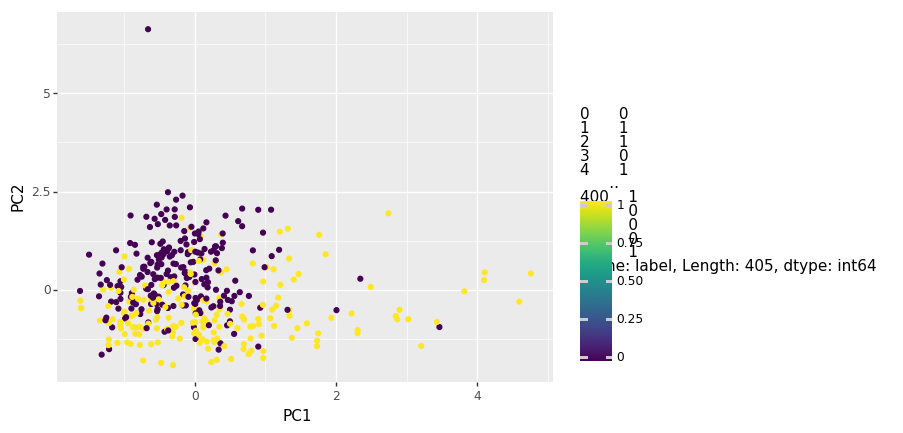

<ggplot: (8783993009689)>

In [42]:
ggplot(train_std,aes(x = 'PC1',y = 'PC2',color = train['label'])) + geom_point()

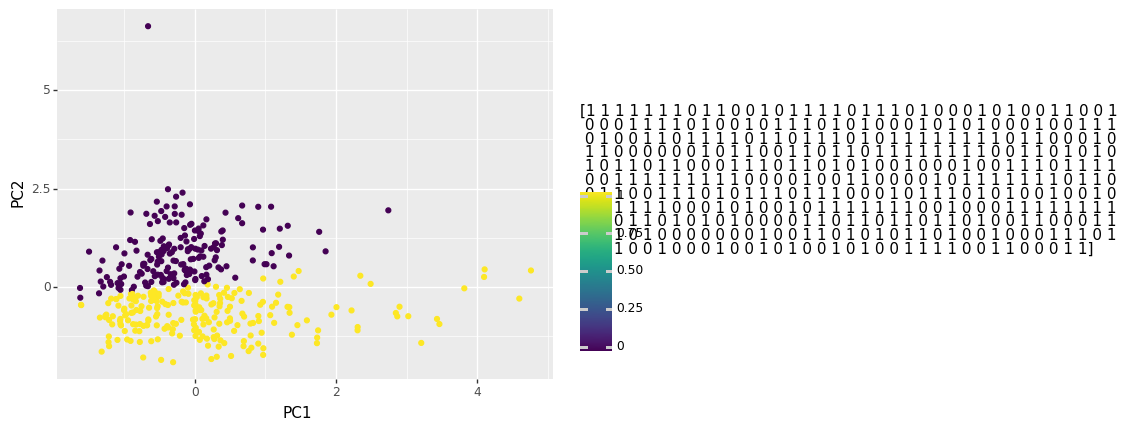

<ggplot: (8783993008121)>

In [43]:
ggplot(train_std,aes(x = 'PC1',y = 'PC2',color = kmeans.labels_)) + geom_point()

In [44]:
data = pd.concat([train_X,test_X]) # 전체 데이터에 대해 pca 진행해야 함
data_std = data[['PC1','PC2']]
data_std = StandardScaler().fit_transform(data_std)
kmeans = KMeans(n_clusters = 2,random_state = 42).fit(data_std)
data['clus'] = kmeans.labels_
train_X = data.iloc[:405,:]
test_X = data.iloc[405:,:]
test_X = test_X.reset_index(drop = True)

데이터가 overlapped 되어 있기 때문에 클러스터링 결과와 다른 부분들도 존재하지만, 예측에 도움이 될 것이라 판단하여 데이터셋에 추가하였습니다.

In [45]:
train_X.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_pctlrange0-2_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,shimmerLocaldB_sma3nz_stddevNorm_mean,HNRdBACF_sma3nz_amean_mean,HNRdBACF_sma3nz_stddevNorm_mean,logRelF0-H1-H2_sma3nz_amean_mean,logRelF0-H1-H2_sma3nz_stddevNorm_mean,logRelF0-H1-A3_sma3nz_amean_mean,logRelF0-H1-A3_sma3nz_stddevNorm_mean,F1frequency_sma3nz_amean_mean,F1frequency_sma3nz_stddevNorm_mean,F1bandwidth_sma3nz_amean_mean,F1bandwidth_sma3nz_stddevNorm_mean,F1amplitudeLogRelF0_sma3nz_stddevNorm_mean,F2frequency_sma3nz_amean_mean,F2frequency_sma3nz_stddevNorm_mean,F2bandwidth_sma3nz_amean_mean,F2bandwidth_sma3nz_stddevNorm_mean,F2amplitudeLogRelF0_sma3nz_stddevNorm_mean,F3frequency_sma3nz_amean_mean,...,logRelF0-H1-H2_sma3nz_stddevNorm_max,logRelF0-H1-A3_sma3nz_amean_max,logRelF0-H1-A3_sma3nz_stddevNorm_max,F1bandwidth_sma3nz_stddevNorm_max,F1amplitudeLogRelF0_sma3nz_stddevNorm_max,F2frequency_sma3nz_stddevNorm_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,PC1,PC2,PC3,PC4,PC5,slope2,clus
0,0.159302,0.001206,0.095556,0.103968,0.241841,0.015937,0.380635,0.175620,21.451660,118.805772,71.780979,0.456544,0.874988,0.695773,0.693588,-0.327011,2.948707,0.621157,-0.636670,0.041140,1.294767,1.411157,0.626918,0.877843,4.139195,-0.287642,-0.290519,15.581802,-0.273956,544.655074,0.392437,1253.904941,0.169909,-2.394409,1537.854905,0.152067,965.712732,0.254926,-1.559542,2522.978859,...,884.256909,41.183660,212.056552,0.004373,310.228394,0.001517,0.013287,13.057997,0.010718,1454.616107,17.167801,0.121265,0.000749,2.103438e+01,0.000062,2.359656,0.056775,38.786267,0.067508,39.441458,76.087625,93.992936,77.820486,36532.756730,19.835802,0.001236,0.000041,3.247842,1.524696,0.038395,0.007741,0.009176,17.493596,-0.014919,-5.380424,-0.042869,1.602869,-2.953234,0.003115,1
1,0.078909,0.000098,0.097341,0.111471,0.152525,0.038076,0.521042,0.180559,17.321590,87.802155,67.882583,0.416345,0.439405,0.502883,0.305130,2.699263,1.668620,1.532773,3.519948,0.065575,1.384110,1.419527,0.543701,-1.146932,0.672221,0.158461,18.794347,16.829154,0.816122,538.892465,0.373174,1256.766817,0.142594,-2.579767,1509.073255,0.163857,955.045890,0.209656,-1.470210,2522.071757,...,267415.174368,34.848164,69.305493,0.000972,300.911736,0.001840,0.005533,0.276725,0.008120,445.160892,8.891616,0.006371,0.000527,1.106866e+07,0.000032,212.740090,0.033280,24.012308,0.017846,21.320284,41.933796,520.846650,41.720618,388.881196,15.238695,0.000494,0.000053,3.604506,2.172738,0.061666,0.010000,0.002145,12.858519,-6.027202,-10.295450,5.539388,-0.682829,-3.421375,0.013102,1
2,0.034322,0.000095,0.022808,0.137666,0.258423,0.052429,0.493060,0.189240,22.535169,162.965797,94.00

In [46]:
test_X.head(5)

,emotion_angry_mean,emotion_disgust_mean,emotion_fear_mean,emotion_happy_mean,emotion_sad_mean,emotion_surprise_mean,emotion_neutral_mean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm_mean,F0semitoneFrom27.5Hz_sma3nz_percentile20.0_mean,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope_mean,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope_mean,loudness_sma3_stddevNorm_mean,loudness_sma3_pctlrange0-2_mean,spectralFlux_sma3_stddevNorm_mean,mfcc1_sma3_stddevNorm_mean,mfcc2_sma3_amean_mean,mfcc2_sma3_stddevNorm_mean,mfcc3_sma3_stddevNorm_mean,mfcc4_sma3_amean_mean,jitterLocal_sma3nz_amean_mean,jitterLocal_sma3nz_stddevNorm_mean,shimmerLocaldB_sma3nz_amean_mean,shimmerLocaldB_sma3nz_stddevNorm_mean,HNRdBACF_sma3nz_amean_mean,HNRdBACF_sma3nz_stddevNorm_mean,logRelF0-H1-H2_sma3nz_amean_mean,logRelF0-H1-H2_sma3nz_stddevNorm_mean,logRelF0-H1-A3_sma3nz_amean_mean,logRelF0-H1-A3_sma3nz_stddevNorm_mean,F1frequency_sma3nz_amean_mean,F1frequency_sma3nz_stddevNorm_mean,F1bandwidth_sma3nz_amean_mean,F1bandwidth_sma3nz_stddevNorm_mean,F1amplitudeLogRelF0_sma3nz_stddevNorm_mean,F2frequency_sma3nz_amean_mean,F2frequency_sma3nz_stddevNorm_mean,F2bandwidth_sma3nz_amean_mean,F2bandwidth_sma3nz_stddevNorm_mean,F2amplitudeLogRelF0_sma3nz_stddevNorm_mean,F3frequency_sma3nz_amean_mean,...,logRelF0-H1-H2_sma3nz_stddevNorm_max,logRelF0-H1-A3_sma3nz_amean_max,logRelF0-H1-A3_sma3nz_stddevNorm_max,F1bandwidth_sma3nz_stddevNorm_max,F1amplitudeLogRelF0_sma3nz_stddevNorm_max,F2frequency_sma3nz_stddevNorm_max,F2bandwidth_sma3nz_stddevNorm_max,F2amplitudeLogRelF0_sma3nz_stddevNorm_max,F3bandwidth_sma3nz_stddevNorm_max,F3amplitudeLogRelF0_sma3nz_amean_max,hammarbergIndexV_sma3nz_amean_max,hammarbergIndexV_sma3nz_stddevNorm_max,slopeV0-500_sma3nz_amean_max,slopeV0-500_sma3nz_stddevNorm_max,slopeV500-1500_sma3nz_amean_max,slopeV500-1500_sma3nz_stddevNorm_max,spectralFluxV_sma3nz_stddevNorm_max,mfcc1V_sma3nz_amean_max,mfcc1V_sma3nz_stddevNorm_max,mfcc2V_sma3nz_amean_max,mfcc3V_sma3nz_amean_max,mfcc3V_sma3nz_stddevNorm_max,mfcc4V_sma3nz_amean_max,mfcc4V_sma3nz_stddevNorm_max,alphaRatioUV_sma3nz_amean_max,slopeUV0-500_sma3nz_amean_max,slopeUV500-1500_sma3nz_amean_max,loudnessPeaksPerSec_max,VoicedSegmentsPerSec_max,MeanVoicedSegmentLengthSec_max,StddevVoicedSegmentLengthSec_max,MeanUnvoicedSegmentLength_max,equivalentSoundLevel_dBp_max,PC1,PC2,PC3,PC4,PC5,slope2,clus
0,0.155693,0.000225,0.077640,0.226517,0.208652,0.044869,0.285805,0.204727,18.768689,120.644116,98.211368,0.517132,0.864454,0.816384,0.527930,1.689141,-3.422121,0.737629,3.275405,0.076818,1.205838,1.659669,0.564678,-0.045818,-1.300836,2.728719,-0.394607,13.197454,2.309000,466.018209,0.311096,1208.817200,0.170271,-1.495334,1481.746006,0.129748,885.219095,0.327115,-1.105450,2469.040134,...,673.608950,23.844690,647.327806,0.002534,0.312737,0.001761,0.012680,0.061312,0.012500,591.961803,14.797768,0.013479,0.000349,4330.337793,0.000049,0.019668,0.069729,21.824390,0.018730,30.531802,66.268935,268.242701,50.879484,667.047326,22.063426,0.000287,0.000038,2.445959,2.175879,0.027020,0.005952,0.003459,15.198562,-5.607462,-7.435838,5.343063,2.504900,-1.776996,0.005729,1
1,0.177189,0.000472,0.095150,0.250708,0.331609,0.024785,0.118970,0.124259,29.709912,83.734519,74.981479,0.456558,1.495853,0.712600,0.830010,-17.246966,-0.134327,1.108757,-15.705268,0.036286,1.259429,1.129771,0.611353,3.541452,1.525943,3.298607,7.724861,12.541421,0.904145,630.279075,0.397053,1145.179231,0.194081,-1.563537,1642.592616,0.154431,890.112660,0.310175,-1.351307,2603.947617,...,19514.142836,45.050133,6.150408,0.006607,9.016917,0.002131,0.019419,34.576160,0.015091,1995.585941,27.573449,4.331645,0.001032,4.839315,0.000077,7.919872,0.040509,71.631249,0.293790,94.483504,88.068110,106.725353,114.730813,317.448196,27.561844,0.000710,0.000046,2.845289,1.989588,0.034542,0.007503,0.028266,45.247296,7.410730,3.790178,-5.301188,5.288428,-3.426319,0.009220,0
2,0.115742,0.000000,0.137801,0.263019,0.037417,0.339825,0.106073,0.275752,18.481840,181.559340,72.631308,0.540517,

In [47]:
train_X.clus.value_counts()

0    205
1    200
Name: clus, dtype: int64

In [48]:
test_X.clus.value_counts()

1    54
0    46
Name: clus, dtype: int64

In [49]:
sum(train_X.clus == train.label) / len(train.label)

0.7209876543209877

# 4. Modeling

### 1. Logistic Regression
(튜닝 파라미터 learning_rate, n_iters)

In [50]:
from scipy.special import expit

In [51]:
from tqdm import tqdm
class LogisticRegression:
  def __init__(self,learning_rate=0.0001, n_iters=1000):
    self.lr = learning_rate
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def _sigmoid(self,x):
    sig = None
    # sig = 1.0 / (1 + np.exp(-x))
    sig = expit(x) # to avoid overflow
    return sig
  
  def get_y_predicted(self,X):
    linear_model = None
    linear_model = np.dot(X,self.weights) + self.bias
    return self._sigmoid(linear_model)

  def compute_gradient(self,X,y,y_predicted):
    n_samples,n_features = X.shape
    dw = None
    db = None
    dw = np.dot(np.transpose(X),(y_predicted - y)) / n_samples
    db = np.sum(y_predicted - y) / n_samples
    return dw,db

  def update(self,dw,db):
    self.weights -= self.lr * dw
    self.bias -= self.lr * db
  
  def fit(self,X,y):
    n_samples,n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in tqdm(range(self.n_iters)):
      y_predicted = self.get_y_predicted(X)
      dw,db = self.compute_gradient(X,y,y_predicted)
      self.update(dw,db)
  
  def predict(self,X):
    y_predicted = self.get_y_predicted(X)
    y_predicted_cls = None
    y_predicted_cls = np.where(y_predicted >= 0.5,1,0)
    return np.array(y_predicted_cls)

### 2. SVM

In [52]:
from tqdm import tqdm
class SVM:
    def __init__(self, learning_rate=0.005, lambda_param=0.01, n_iters=5000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0,-1,1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for num_iter in tqdm(range(self.n_iters)):
          for idx,x_i in enumerate(X):

                condition = y_[idx] * (np.dot(x_i,self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i,y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        my_predictions = np.dot(X,self.w) - self.b
        my_predictions = np.sign(my_predictions)
        my_predictions = np.where(my_predictions == -1,0,1)
        return my_predictions

In [53]:
def X_feature_merge_to_numpy(X_feature):
  X_feature_list = [X_feature.iloc[i].tolist() for i in range(len(X_feature))]
  X_feature_numpy = np.array(X_feature_list)
  return X_feature_numpy

## 3. Random Forest

In [54]:
def gini_impurity(labels):
    if labels.size == 0:
        return 0
    counts = np.unique(labels,return_counts = True)[1]
    fractions = counts / float(len(labels))
    return 1 - np.sum(fractions ** 2)

def entropy(labels):
    if labels.size == 0:
        return 0
    counts = np.unique(labels,return_counts = True)[1]
    fractions = counts / float(len(labels))
    return - np.sum(fractions * np.log2(fractions))

criterion_function = {'gini': gini_impurity, 'entropy': entropy}
def weighted_impurity(groups, criterion='gini'):
    total = sum(len(group) for group in groups)
    weighted_sum = 0.0
    for group in groups:
        weighted_sum += len(group) / float(total) * criterion_function[criterion](group)
    return weighted_sum

def split_node(X, y, index, value):
    X_ind = X[:,index]
    if X_ind.dtype == 'i' or X_ind.dtype == 'f':
      flag = X_ind >= value
    else:
      flag = X_ind == value
    left = [X[flag == False,:],y[flag == False]]
    right = [X[flag == True,:],y[flag == True]]
    return left, right

def get_best_split(X, y, criterion):
    best_index, best_value, best_score, children = None, None, 1, None
    for index in range(len(X[0])):
        for value in np.sort(np.unique(X[:, index])):
            splitted_node = split_node(X,y,index,value)
            impurity = weighted_impurity([splitted_node[0][1],splitted_node[1][1]],criterion)
            if impurity < best_score:
              best_index,best_value,best_score,children = index,value,impurity,splitted_node
    return {'index': best_index, 'value': best_value, 'children': children}

def get_leaf(labels):
    return np.bincount(labels).argmax()

def split(node, max_depth, min_size, depth, criterion):
    left, right = node['children']
    del (node['children'])
    if left[1].size == 0:
        node['right'] = get_leaf(right[1])
        return
    if right[1].size == 0:
        node['left'] = get_leaf(left[1])
        return
    if depth >= max_depth:
        node['left'], node['right'] = get_leaf(left[1]), get_leaf(right[1])
        return
    if left[1].size <= min_size:
        node['left'] = get_leaf(left[1])
    else:
        interim = get_best_split(left[0],left[1],criterion)
        interim_left = interim['children'][0]
        interim_right = interim['children'][1]

        if interim_left[1].size == 0:
          node['left'] = get_leaf(interim_right[1])
        elif interim_right[1].size == 0:
          node['left'] = get_leaf(interim_left[1])
        else:
          node['left'] = interim
          split(node['left'],max_depth,min_size,depth+1,criterion)

    if right[1].size <= min_size:
        node['right'] = get_leaf(right[1])
    else:
        interim = get_best_split(right[0],right[1],criterion)
        interim_left = interim['children'][0]
        interim_right = interim['children'][1]

        if interim_left[1].size == 0:
          node['right'] = get_leaf(interim_right[1])
        elif interim_right[1].size == 0:
          node['right'] = get_leaf(interim_left[1])
        else:
          node['right'] = interim
          split(node['right'],max_depth,min_size,depth+1,criterion)

def train_tree(X_train, y_train, max_depth, min_size, criterion='gini'):
    X = np.array(X_train)
    y = np.array(y_train)
    root = get_best_split(X, y, criterion)
    split(root, max_depth, min_size, 1, criterion)
    return root

In [55]:
CONDITION = {'numerical': {'yes': '>=', 'no': '<'},
             'categorical': {'yes': 'is', 'no': 'is not'}}

# {'index': 0, 'value': 'fashion', 'left': {'index': 1, 'value': 'professional', 'left': 0, 'right': 1}, 'right': 0}

def classify(node,example):
  feature = node['index']
  value = node['value']
  if node['value'].dtype.kind in ['i', 'f']:
    condition = CONDITION['numerical']
    if example[feature] >= value:
      result = node['right']
    else:
      result = node['left']
  else:
    condition = CONDITION['categorical']
    if example[feature] == value:
      result = node['right']
    else:
      result = node['left']
  
  if isinstance(result,dict):
    return classify(result,example)
  else:
    return result

def predict_tree(X_test,tree):
  predictions = []
  for i in range(len(X_test)):
    predictions.append(classify(tree,X_test.iloc[i,]))
  return predictions

In [56]:
def subsample(X_train, y_train):
  n_rows, n_cols = X_train.shape
  samples = np.random.choice(a = n_rows, size = n_rows, replace = True)
  return X_train.iloc[samples,], y_train.iloc[samples]

def randomForest(X_train, y_train, n_trees, max_depth, min_size, criterion = 'gini'):
  forest = []
  np.random.seed(123)
  for i in tqdm(range(n_trees)):
    X_boot, y_boot = subsample(X_train,y_train)
    tree = train_tree(X_boot, y_boot, max_depth, min_size, criterion)
    forest.append(tree)
  return forest
  
def predict_rf(X_test,forest):
  df_predict = {}
  for i in range(len(forest)):
    column_name = "tree_{}".format(i)
    prediction = predict_tree(X_test,forest[i])
    df_predict[column_name] = prediction

  df_predict = pd.DataFrame(df_predict)
  predictions = df_predict.mode(axis = 1)[0] # majority vote rule

  return predictions

# 5. Experiments

> Feature Selection

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
selected_var = ['slopeUV0-500_sma3nz_amean_min','slope2','PC2','clus','slopeV0-500_sma3nz_amean_min',
                'emotion_happy_max','loudness_sma3_stddevRisingSlope_max','spectralFluxV_sma3nz_amean_mean',
                'slopeV0-500_sma3nz_amean_max','slopeUV0-500_sma3nz_amean_max','loudness_sma3_stddevNorm_mean']
selected_X = train_X[selected_var]
X_tr, X_val, Y_tr, Y_val = train_test_split(selected_X, Y_train, test_size = 0.3, 
                                            shuffle = True,stratify = Y_train,random_state = 123)

lr = LogisticRegression()
lr.fit(X_tr,Y_tr)

100%|██████████| 1000/1000 [00:01<00:00, 774.36it/s]


In [ ]:
Y_pred = lr.predict(X_val)
print(classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.83      0.79        66
           1       0.77      0.66      0.71        56

    accuracy                           0.75       122
   macro avg       0.76      0.75      0.75       122
weighted avg       0.76      0.75      0.75       122



In [ ]:
selected_var = ['slopeUV0-500_sma3nz_amean_min','PC2','emotion_happy_max','loudness_sma3_stddevNorm_mean',
                'MeanUnvoicedSegmentLength_max','spectralFlux_sma3_stddevNorm_mean','mfcc2_sma3_amean_min']
selected_X = train_X[selected_var]
X_tr, X_val, Y_tr, Y_val = train_test_split(selected_X, Y_train, test_size = 0.3, 
                                            shuffle = True,stratify = Y_train,random_state = 123)

lr = LogisticRegression()
lr.fit(X_tr,Y_tr)

100%|██████████| 1000/1000 [00:01<00:00, 925.33it/s]


In [ ]:
Y_pred = lr.predict(X_val)
print(classification_report(Y_val,Y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        66
           1       0.81      0.70      0.75        56

    accuracy                           0.79       122
   macro avg       0.79      0.78      0.78       122
weighted avg       0.79      0.79      0.78       122



후자의 정확도가 더 높기 때문에 해당 변수들로 파라미터 튜닝을 진행하기로 한다.

> Split data into train / validation set

In [58]:
selected_var = ['slopeUV0-500_sma3nz_amean_min','PC2','emotion_happy_max','loudness_sma3_stddevNorm_mean',
                'MeanUnvoicedSegmentLength_max','spectralFlux_sma3_stddevNorm_mean','mfcc2_sma3_amean_min']
selected_X = train_X[selected_var]
X_tr, X_val, Y_tr, Y_val = train_test_split(selected_X, Y_train, test_size = 0.3, 
                                            shuffle = True,stratify = Y_train,random_state = 123)

In [59]:
X_train_fin = train_X[selected_var]
X_test_fin = test_X[selected_var]

In [ ]:
Y_tr.value_counts()

0    152
1    131
Name: label, dtype: int64

In [ ]:
Y_val.value_counts()

0    66
1    56
Name: label, dtype: int64

### 1. Parameter Tuning - Logistic Regression

- Grid Search

In [ ]:
from sklearn.metrics import accuracy_score

learning_rates = [0.001,0.005,0.01,0.05,0.1,0.5]
n_iters = [1000,5000,10000,50000,100000]
results = []

for lr in learning_rates:
  for iter in n_iters:
    logistic = LogisticRegression(learning_rate = lr, n_iters = iter)
    logistic.fit(X_tr,Y_tr)
    Y_pred = logistic.predict(X_val)
    acc = accuracy_score(Y_val,Y_pred)
    results.append((lr,iter,acc))

results = pd.DataFrame(results)
results.columns = ['learning_rate','Iteration','accuracy']
results.sort_values(by = ['accuracy'],ascending = False,axis = 0,inplace = True)

100%|██████████| 100000/100000 [01:48<00:00, 923.41it/s]


In [ ]:
results

,learning_rate,Iteration,accuracy
14,0.010,100000,0.811475
9,0.005,100000,0.786885
13,0.010,50000,0.786885
8,0.005,50000,0.770492
4,0.001,100000,0.762295
12,0.010,10000,0.762295
1,0.001,5000,0.729508
10,0.010,1000,0.729508
0,0.001,1000,0.729508
5,0.005,1000,0.729508


In [ ]:
from sklearn.metrics import accuracy_score

learning_rates = [0.006,0.008,0.01,0.012,0.014]
n_iters = [50000,60000,70000,80000,90000,100000]
results = []

for lr in learning_rates:
  for iter in n_iters:
    logistic = LogisticRegression(learning_rate = lr, n_iters = iter)
    logistic.fit(X_tr,Y_tr)
    Y_pred = logistic.predict(X_val)
    acc = accuracy_score(Y_val,Y_pred)
    results.append((lr,iter,acc))

results = pd.DataFrame(results)
results.columns = ['learning_rate','Iteration','accuracy']
results.sort_values(by = ['accuracy'],ascending = False,axis = 0,inplace = True)

100%|██████████| 100000/100000 [01:49<00:00, 910.49it/s]


In [ ]:
results

,learning_rate,Iteration,accuracy
29,0.014,100000,0.819672
28,0.014,90000,0.819672
27,0.014,80000,0.819672
23,0.012,100000,0.819672
22,0.012,90000,0.819672
14,0.010,70000,0.811475
26,0.014,70000,0.811475
25,0.014,60000,0.811475
24,0.014,50000,0.811475
21,0.012,80000,0.811475


In [ ]:
best_lr = LogisticRegression(learning_rate = 0.014, n_iters = 100000)
best_lr.fit(X_train_fin,Y_train)
Y_pred = best_lr.predict(X_test_fin)

100%|██████████| 100000/100000 [01:53<00:00, 879.12it/s]


In [ ]:
pd.DataFrame(Y_pred).to_csv('2017311974.csv',header = None)

In [ ]:
y_pred = best_lr.predict(X_train_fin)
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       218
           1       0.78      0.79      0.79       187

    accuracy                           0.80       405
   macro avg       0.80      0.80      0.80       405
weighted avg       0.80      0.80      0.80       405



### 2. Parameter Tuning - SVM

In [ ]:
learning_rates = [0.001,0.005,0.01,0.05,0.1,0.5]
n_iters = [1000,5000,10000,50000,100000]
lams = [0.0001,0.001,0.01,0.1,1]
results = []

X_tr_np = X_feature_merge_to_numpy(X_tr)
X_val_np = X_feature_merge_to_numpy(X_val)

for lr in learning_rates:
  for iter in n_iters:
    for lam in lams:
      svm = SVM(learning_rate = lr,n_iters = iter,lambda_param = lam)
      svm.fit(X_tr_np,Y_tr)
      Y_pred = svm.predict(X_val_np)
      acc = accuracy_score(Y_val,Y_pred)
      results.append((lr,iter,lam,acc))

results = pd.DataFrame(results)
results.columns = ['learning_rate','Iteration','lambda','accuracy']
results.sort_values(by = ['accuracy'],ascending = False,axis = 0,inplace = True)

100%|██████████| 100000/100000 [08:22<00:00, 199.05it/s]


In [ ]:
results

,learning_rate,Iteration,lambda,accuracy
141,0.50,50000,0.0010,0.688525
112,0.10,10000,0.0100,0.663934
103,0.10,1000,0.0100,0.663934
102,0.10,1000,0.0100,0.663934
113,0.10,10000,0.0100,0.663934
...,...,...,...,...
66,0.01,50000,0.0010,0.442623
145,0.50,100000,0.0001,0.442623
58,0.01,5000,0.0100,0.442623
57,0.01,5000,0.0100,0.442623


### 3. Parameter tuning: RandomForest

In [141]:
n_trees = [3,5]
max_depths = [3,5,10,40,70,100]
min_sizes = [2,4,6,8,10]
results = []

for n_tree in n_trees:
  for max_depth in max_depths:
    for min_size in min_sizes:
      rf = randomForest(X_train = X_tr, y_train = Y_tr, n_trees = n_tree, max_depth = max_depth, min_size = min_size, criterion = 'gini')
      Y_pred = predict_rf(X_val,rf)
      acc = accuracy_score(Y_val,Y_pred)
      results.append((n_tree,max_depth,min_size,acc))

results = pd.DataFrame(results)
results.columns = ['n_tree','max_depth','min_size','accuracy']
results.sort_values(by = ['accuracy'],ascending = False,axis = 0,inplace = True)
results


100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

100%|██████████| 3/3 [00:01<00:00,  2.32it/s]

100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

100%|██████████| 3/3 [00:01<00:00,  2.26it/s]

100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

100%|██████████| 3/3 [00:03<00:00,  1.31s/it]

100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

100%|██████████| 3/3 [00:03<00:00,  1.30s/it]

100%|██████████| 3/3 [00:03<00:00,  1.29s/it]

100%|██████████| 3/3 [00:13<00:00,  4.53s/it]

100%|██████████| 3/3 [00:13<00:00,  4.63s/it]

100%|██████████| 3/3 [00:13<00:00,  4.65s/it]

100%|██████████| 3/3 [00:14<00:00,  4.70s/it]

100%|██████████| 3/3 [00:14<00:00,  4.73s/it]

100%|██████████| 3/3 [00:22<00:00,  7.50s/it]

100%|███████

,n_tree,max_depth,min_size,accuracy
30,5,3,2,0.737705
34,5,3,10,0.737705
33,5,3,8,0.737705
32,5,3,6,0.737705
31,5,3,4,0.737705
39,5,5,10,0.704918
38,5,5,8,0.704918
37,5,5,6,0.704918
36,5,5,4,0.704918
35,5,5,2,0.704918


In [145]:
results

,n_tree,max_depth,min_size,accuracy
30,5,3,2,0.737705
34,5,3,10,0.737705
33,5,3,8,0.737705
32,5,3,6,0.737705
31,5,3,4,0.737705
39,5,5,10,0.704918
38,5,5,8,0.704918
37,5,5,6,0.704918
36,5,5,4,0.704918
35,5,5,2,0.704918


In [60]:
n_trees = [50,100,150,200]
max_depths = [3,5,10,40]
min_sizes = [2,4,6,8,10]
results = []

for n_tree in n_trees:
  for max_depth in max_depths:
    for min_size in min_sizes:
      rf = randomForest(X_train = X_tr, y_train = Y_tr, n_trees = n_tree, max_depth = max_depth, min_size = min_size, criterion = 'gini')
      Y_pred = predict_rf(X_val,rf)
      acc = accuracy_score(Y_val,Y_pred)
      results.append((n_tree,max_depth,min_size,acc))

results = pd.DataFrame(results)
results.columns = ['n_tree','max_depth','min_size','accuracy']
results.sort_values(by = ['accuracy'],ascending = False,axis = 0,inplace = True)
results

100%|██████████| 200/200 [15:48<00:00,  4.74s/it]


,n_tree,max_depth,min_size,accuracy
0,50,3,2,0.737705
20,100,3,2,0.737705
22,100,3,6,0.737705
23,100,3,8,0.737705
24,100,3,10,0.737705
...,...,...,...,...
35,100,40,2,0.524590
15,50,40,2,0.524590
16,50,40,4,0.524590
17,50,40,6,0.524590


In [61]:
results

,n_tree,max_depth,min_size,accuracy
0,50,3,2,0.737705
20,100,3,2,0.737705
22,100,3,6,0.737705
23,100,3,8,0.737705
24,100,3,10,0.737705
...,...,...,...,...
35,100,40,2,0.524590
15,50,40,2,0.524590
16,50,40,4,0.524590
17,50,40,6,0.524590


SVM, Random Forest 보다 Logistic Regression의 결과가 더 좋았으므로, Logistic Regression(learning_rate = 0.014, n_iters = 100000)을 최종 모델로 선정하였다.

> Prediction using best model

In [ ]:
best_model = LogisticRegression(learning_rate = 0.014,n_iters = 100000)
best_model.fit(X_train_fin,Y_train)
Y_pred = best_model.predict(X_test_fin)

100%|██████████| 100000/100000 [01:48<00:00, 920.66it/s]


> Submission

In [ ]:
pd.DataFrame(Y_pred).to_csv('2017311974.csv',header = None)

> Train set에 대한 Accuracy는 어떤지 대략적으로 확인

In [ ]:
y_pred = best_model.predict(X_train_fin)
print(classification_report(Y_train,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       218
           1       0.78      0.79      0.79       187

    accuracy                           0.80       405
   macro avg       0.80      0.80      0.80       405
weighted avg       0.80      0.80      0.80       405

